FASHION-MNIST

Importing Libraries

In [9]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision.transforms import ToTensor
from torchvision import datasets
import matplotlib.pyplot as plt

Loading Data

In [11]:
batch_size = 64

training_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)
train_dl = DataLoader(training_data, batch_size = batch_size)

test_data=datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),)
test_dl = DataLoader(test_data, batch_size = batch_size)

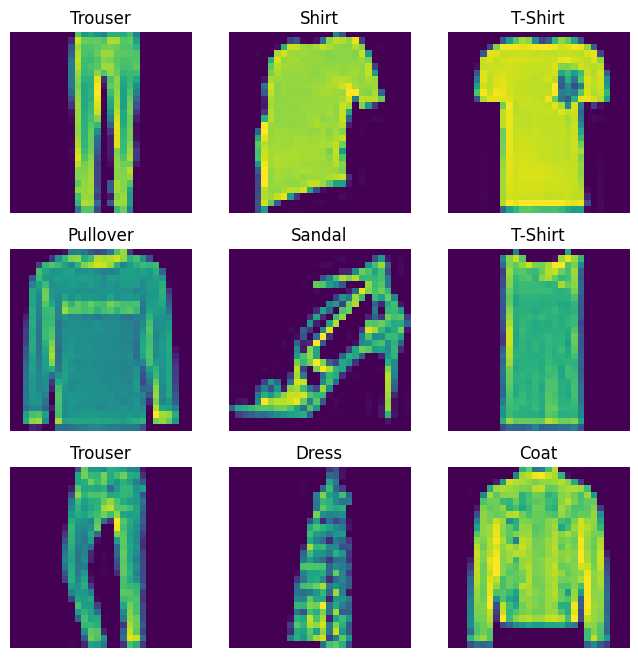

In [25]:
labels = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

In [27]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to('cpu')

In [39]:
learning_rate = 1e-3
epochs = 100

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [33]:
def trainer(dataloader: DataLoader, model: NeuralNetwork, loss: nn, optim):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X,y=X.to('cpu'),y.to('cpu')
        
        prediction = model(X)
        loss = loss_fn(prediction, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f'loss:{loss:>7f} [{current:>5d}/{size:>5d}]')

In [34]:
def evaluate (dataloader: DataLoader, model: NeuralNetwork, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X,y in dataloader:
            X,y = X.to('cpu'),y.to('cpu')
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')

In [40]:
for i in range(epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    trainer(train_dl, model, loss_fn, optimizer)
    evaluate(test_dl, model, loss_fn)

Epoch 1
-------------------------------
loss:0.485201 [    0/60000]
loss:0.601555 [ 6400/60000]
loss:0.395116 [12800/60000]
loss:0.640136 [19200/60000]
loss:0.580327 [25600/60000]
loss:0.553756 [32000/60000]
loss:0.570105 [38400/60000]
loss:0.663160 [44800/60000]
loss:0.639670 [51200/60000]
loss:0.552297 [57600/60000]
Test Error: 
 Accuracy: 80.4%, Avg loss: 0.565563 

Epoch 2
-------------------------------
loss:0.475982 [    0/60000]
loss:0.593028 [ 6400/60000]
loss:0.388454 [12800/60000]
loss:0.632928 [19200/60000]
loss:0.574481 [25600/60000]
loss:0.548724 [32000/60000]
loss:0.562336 [38400/60000]
loss:0.661852 [44800/60000]
loss:0.636921 [51200/60000]
loss:0.544012 [57600/60000]
Test Error: 
 Accuracy: 80.6%, Avg loss: 0.559402 

Epoch 3
-------------------------------
loss:0.467414 [    0/60000]
loss:0.585102 [ 6400/60000]
loss:0.382244 [12800/60000]
loss:0.626048 [19200/60000]
loss:0.568788 [25600/60000]
loss:0.543853 [32000/60000]
loss:0.555253 [38400/60000]
loss:0.661053 [44800

KeyboardInterrupt: 